In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from pd_model import *

In [4]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
figsize(12,10)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)


In [5]:
def plot_matrix(frame, **args):
    from matplotlib.colors import LogNorm
    x,y = np.meshgrid(np.array(frame.index,   dtype=float),
                      np.array(frame.columns, dtype=float))
    z = frame.T.values.astype(float)
    ret = gca().pcolor(y,x,z, **args)
    (lambda x: xlim(x[0],x[-1]))(frame.columns)
    (lambda x: ylim(x[0],x[-1]))(frame.index  ) 
    return ret

# Charging up the model

In [6]:
frame = pd.DataFrame.from_csv("datasets/R_resolution.csv")
frame = frame.divide(frame.sum(axis=1),axis=0)
rgdtMeasured  = np.array(frame.columns.astype(float))
rgdtTheoretic = np.array(frame.index.astype(float))
rgdtF = frame.values[:-1,:-1]

frame = pd.DataFrame.from_csv("datasets/B_resolution.csv")
frame = frame.divide(frame.sum(axis=1),axis=0)
betaMeasured  = np.array(frame.columns.astype(float))
betaTheoretic = np.array(frame.index.astype(float))
betaF = frame.values[:-1,:-1]

In [7]:
model = PDModel(
    betaBinsTheoretic=betaTheoretic,
    betaBinsMeasured=betaMeasured ,
    rgdtBinsTheoretic=rgdtTheoretic, 
    rgdtBinsMeasured=rgdtMeasured 
)
model.set_rigidity_resolution(rgdtF)
model.set_beta_resolution(betaF)

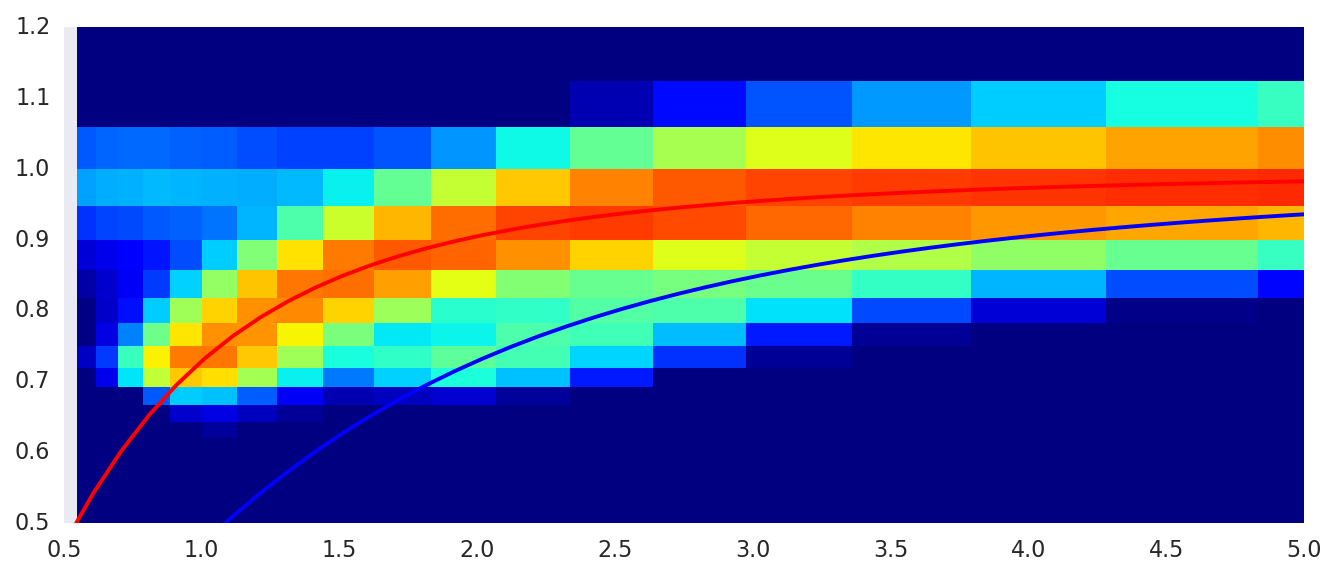

In [11]:
test = 1+np.zeros_like(betaTheoretic)[:-1]

rcParams['savefig.dpi'] = 160
figsize(10,4)

r = model(test,test/10)
frame = pd.DataFrame(r, columns=rgdtMeasured[:-1], index=betaMeasured[:-1])
plot_matrix(frame,norm=LogNorm(vmin=0.001,vmax=1))
xlim(0.5,5.0)
ylim(0.5,1.2)

x = np.linspace(0,10,100)
plot(x, beta_from_R(x,mp),'r')
plot(x, beta_from_R(x,md),'b')

In [81]:
r*100000

array([[  5.93812729e-01,   8.25485176e-01,   2.04006930e+00,
          8.12609989e+00,   1.95907557e+01,   2.44881619e+01,
          2.15601060e+01,   1.80509088e+01,   1.81055157e+01,
          2.42823079e+01,   3.22015533e+01,   3.42464350e+01,
          3.10795216e+01,   2.72267748e+01,   2.61245338e+01,
          2.41283048e+01,   2.23080062e+01,   2.23598388e+01,
          2.08947446e+01,   1.99036591e+01,   1.97095526e+01,
          1.85352219e+01,   1.85103635e+01,   1.84364221e+01],
       [  7.15372122e-01,   9.84529541e-01,   2.26491293e+00,
          8.80613857e+00,   2.25073355e+01,   3.16405255e+01,
          3.06771780e+01,   2.58208079e+01,   2.37244479e+01,
          2.83155454e+01,   3.74730820e+01,   4.52010714e+01,
          4.44198873e+01,   3.77413591e+01,   3.24725070e+01,
          2.75458699e+01,   2.44533066e+01,   2.45581103e+01,
          2.36513137e+01,   2.21025489e+01,   2.09045442e+01,
          2.04497349e+01,   1.98265603e+01,   1.80542565e+01],
      

In [79]:
np.savetxt("datasets/observed_mock_equal.txt",r*100000)

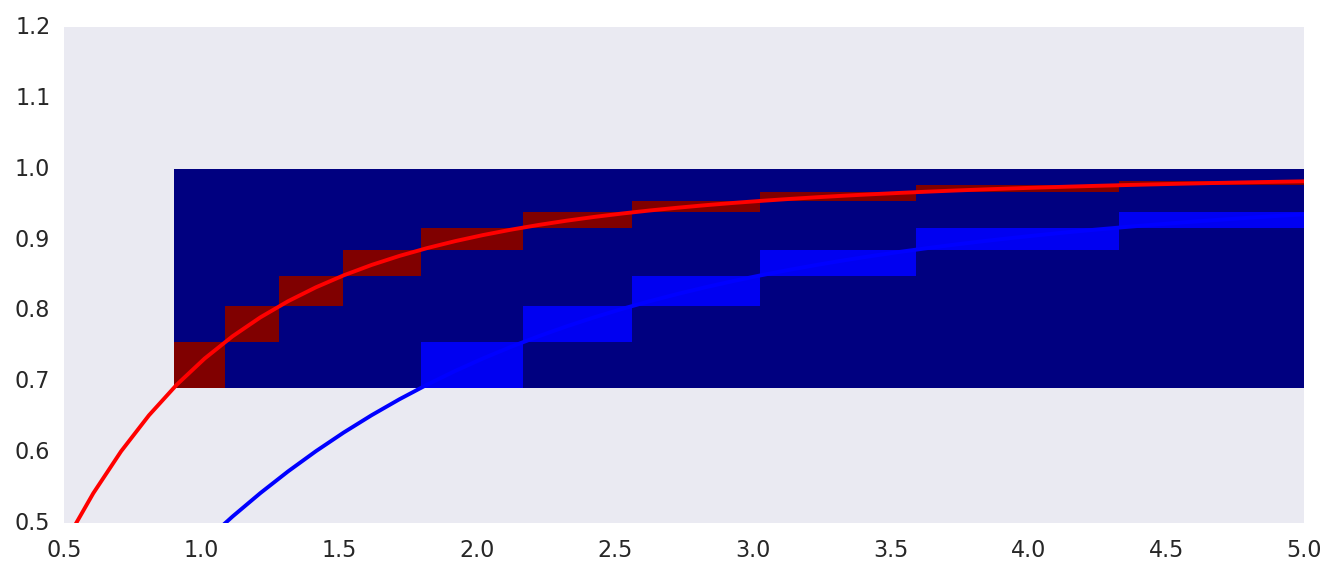

In [14]:
rcParams['savefig.dpi'] = 160
figsize(10,4)

frame = pd.DataFrame(model.deltaP+model.deltaD/10, columns=rgdtTheoretic[:-1], index=betaTheoretic[:-1])
plot_matrix(frame)
xlim(0.5,5.0)
ylim(0.5,1.2)
x = np.linspace(0,10,100)
plot(x, beta_from_R(x,mp),'r')
plot(x, beta_from_R(x,md),'b')